In [1]:

import numpy as np
import pandas as pd

In [2]:
# Load the dataset
diabetes_dataset = pd.read_csv('abm2.csv')

In [3]:
# printing the first 5 rows of the dataset
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.0,0.0,33.6,0.627,50,1
1,1,85,66,29.0,0.0,26.6,0.351,31,0
2,8,183,64,0.0,0.0,23.3,0.672,32,1
3,1,89,66,23.0,94.0,28.1,0.167,21,0
4,0,137,40,35.0,168.0,43.1,2.288,33,1


In [4]:
# number of rows and Columns in this dataset
diabetes_dataset.shape

(3000, 9)

In [5]:
diabetes_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               3000 non-null   int64  
 1   Glucose                   3000 non-null   int64  
 2   BloodPressure             3000 non-null   int64  
 3   SkinThickness             3000 non-null   float64
 4   Insulin                   3000 non-null   float64
 5   BMI                       3000 non-null   float64
 6   DiabetesPedigreeFunction  3000 non-null   float64
 7   Age                       3000 non-null   int64  
 8   Outcome                   3000 non-null   int64  
dtypes: float64(4), int64(5)
memory usage: 211.1 KB


In [6]:
diabetes_dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
diabetes_dataset.duplicated().sum()

np.int64(0)

In [8]:
# Removing duplicate rows
print("Data shape before removing duplicates:", diabetes_dataset.shape)
diabetes_dataset.drop_duplicates(inplace=True)
print("Data shape after removing duplicates:", diabetes_dataset.shape)


Data shape before removing duplicates: (3000, 9)
Data shape after removing duplicates: (3000, 9)


In [9]:
# getting the statistical measures of the data
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,3.842333,120.799333,69.064333,20.536251,79.863966,31.967366,0.507023,33.366333,0.348000
std,3.368173,32.009946,19.352735,15.950230,115.297352,7.897421,0.369929,11.799204,0.476415
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000580,20.000000,0.000000
25%,1.000000,99.000000,63.000000,0.000000,0.000000,27.200000,0.247000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,34.000000,32.000000,0.400397,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.130719,36.584079,0.679337,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.538960,846.000000,67.821213,3.043532,82.000000,1.000000


In [10]:
# number of rows counted on the basis of the number of "Outcome" which is 0 and 1
# koto gulo "0" ache aar koto gulo "1" ache Outcome column e

diabetes_dataset['Outcome'].value_counts()

Outcome
0    1956
1    1044
Name: count, dtype: int64

In [11]:
# the following has been used to find the mean of the various features of the dataset by grouping them
# on the basis of the feature "Outcome" (column)

diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.292945,109.934560,68.168200,19.632829,68.585817,30.257484,0.473554,31.338957
1,4.871648,141.155172,70.743295,22.228870,100.994291,35.170936,0.569728,37.164751


<Axes: >

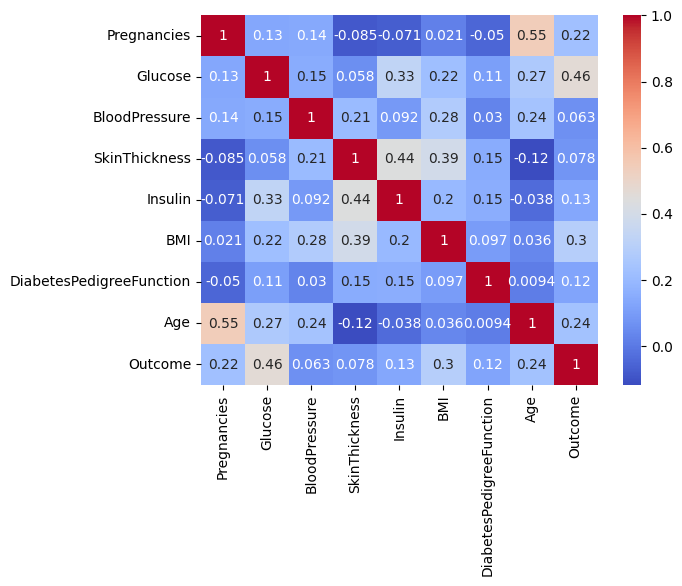

In [12]:
import seaborn as sns
new = diabetes_dataset.iloc[ : , ]
new.corr()
sns.heatmap(new.corr(), annot=True, cbar=True, cmap='coolwarm')

In [13]:
corr_matrix=diabetes_dataset.corr()
corr_matrix["Outcome"]

Pregnancies                 0.223302
Glucose                     0.464667
BloodPressure               0.063392
SkinThickness               0.077541
Insulin                     0.133914
BMI                         0.296406
DiabetesPedigreeFunction    0.123859
Age                         0.235228
Outcome                     1.000000
Name: Outcome, dtype: float64

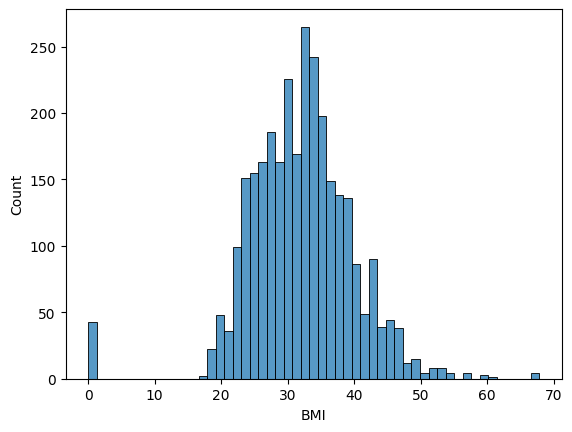

In [14]:
import matplotlib.pyplot as plt
sns.histplot(diabetes_dataset ['BMI'])
plt.show()

Text(0.5, 1.0, 'Before Scaling')

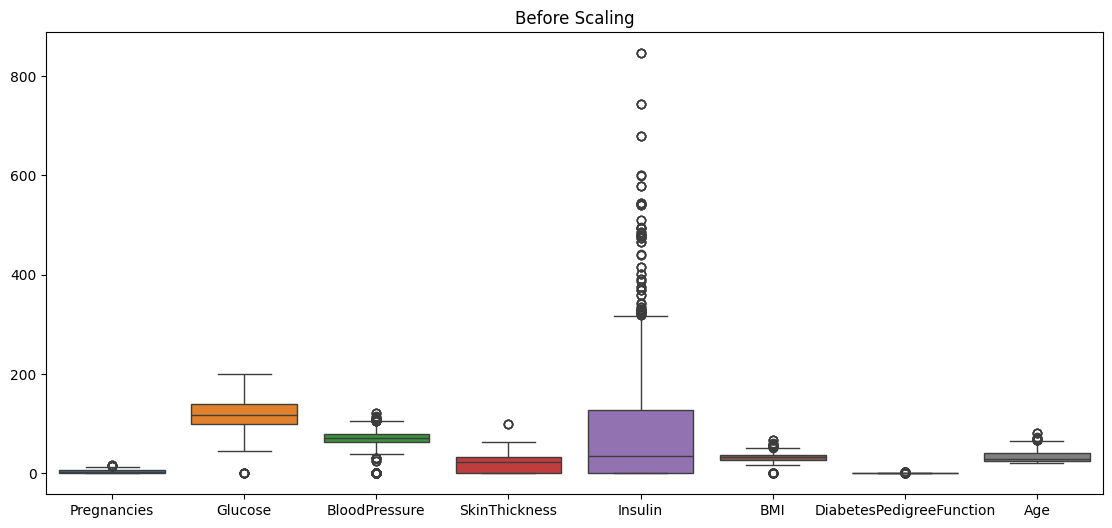

In [15]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(diabetes_dataset.iloc[:, :-1])  # Excluding the target column

# Visualizing the scaled data
plt.figure(figsize=(30, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=diabetes_dataset.iloc[:, :-1])
plt.title('Before Scaling')



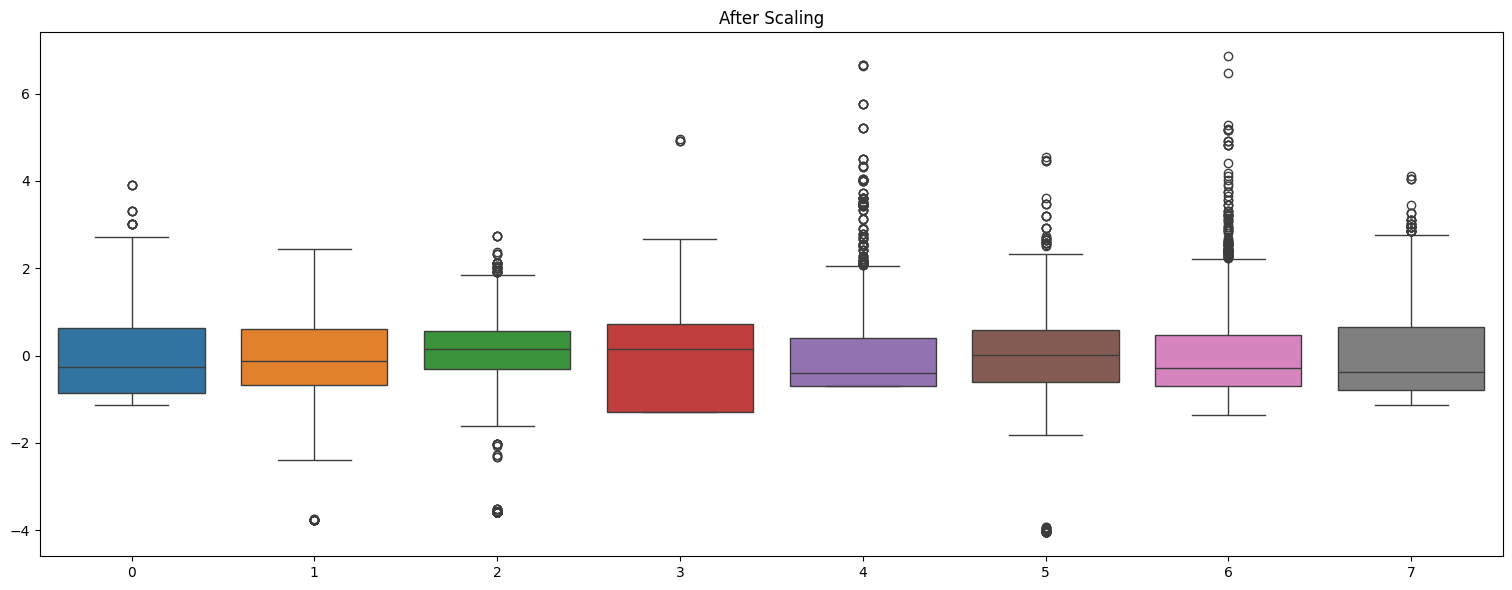

In [16]:
plt.figure(figsize=(30, 6))
plt.subplot(1, 2, 2)
sns.boxplot(data=scaled_features)
pd.DataFrame(scaled_features, columns=(diabetes_dataset.columns[:-1]))
plt.title('After Scaling')

plt.tight_layout()
plt.show()


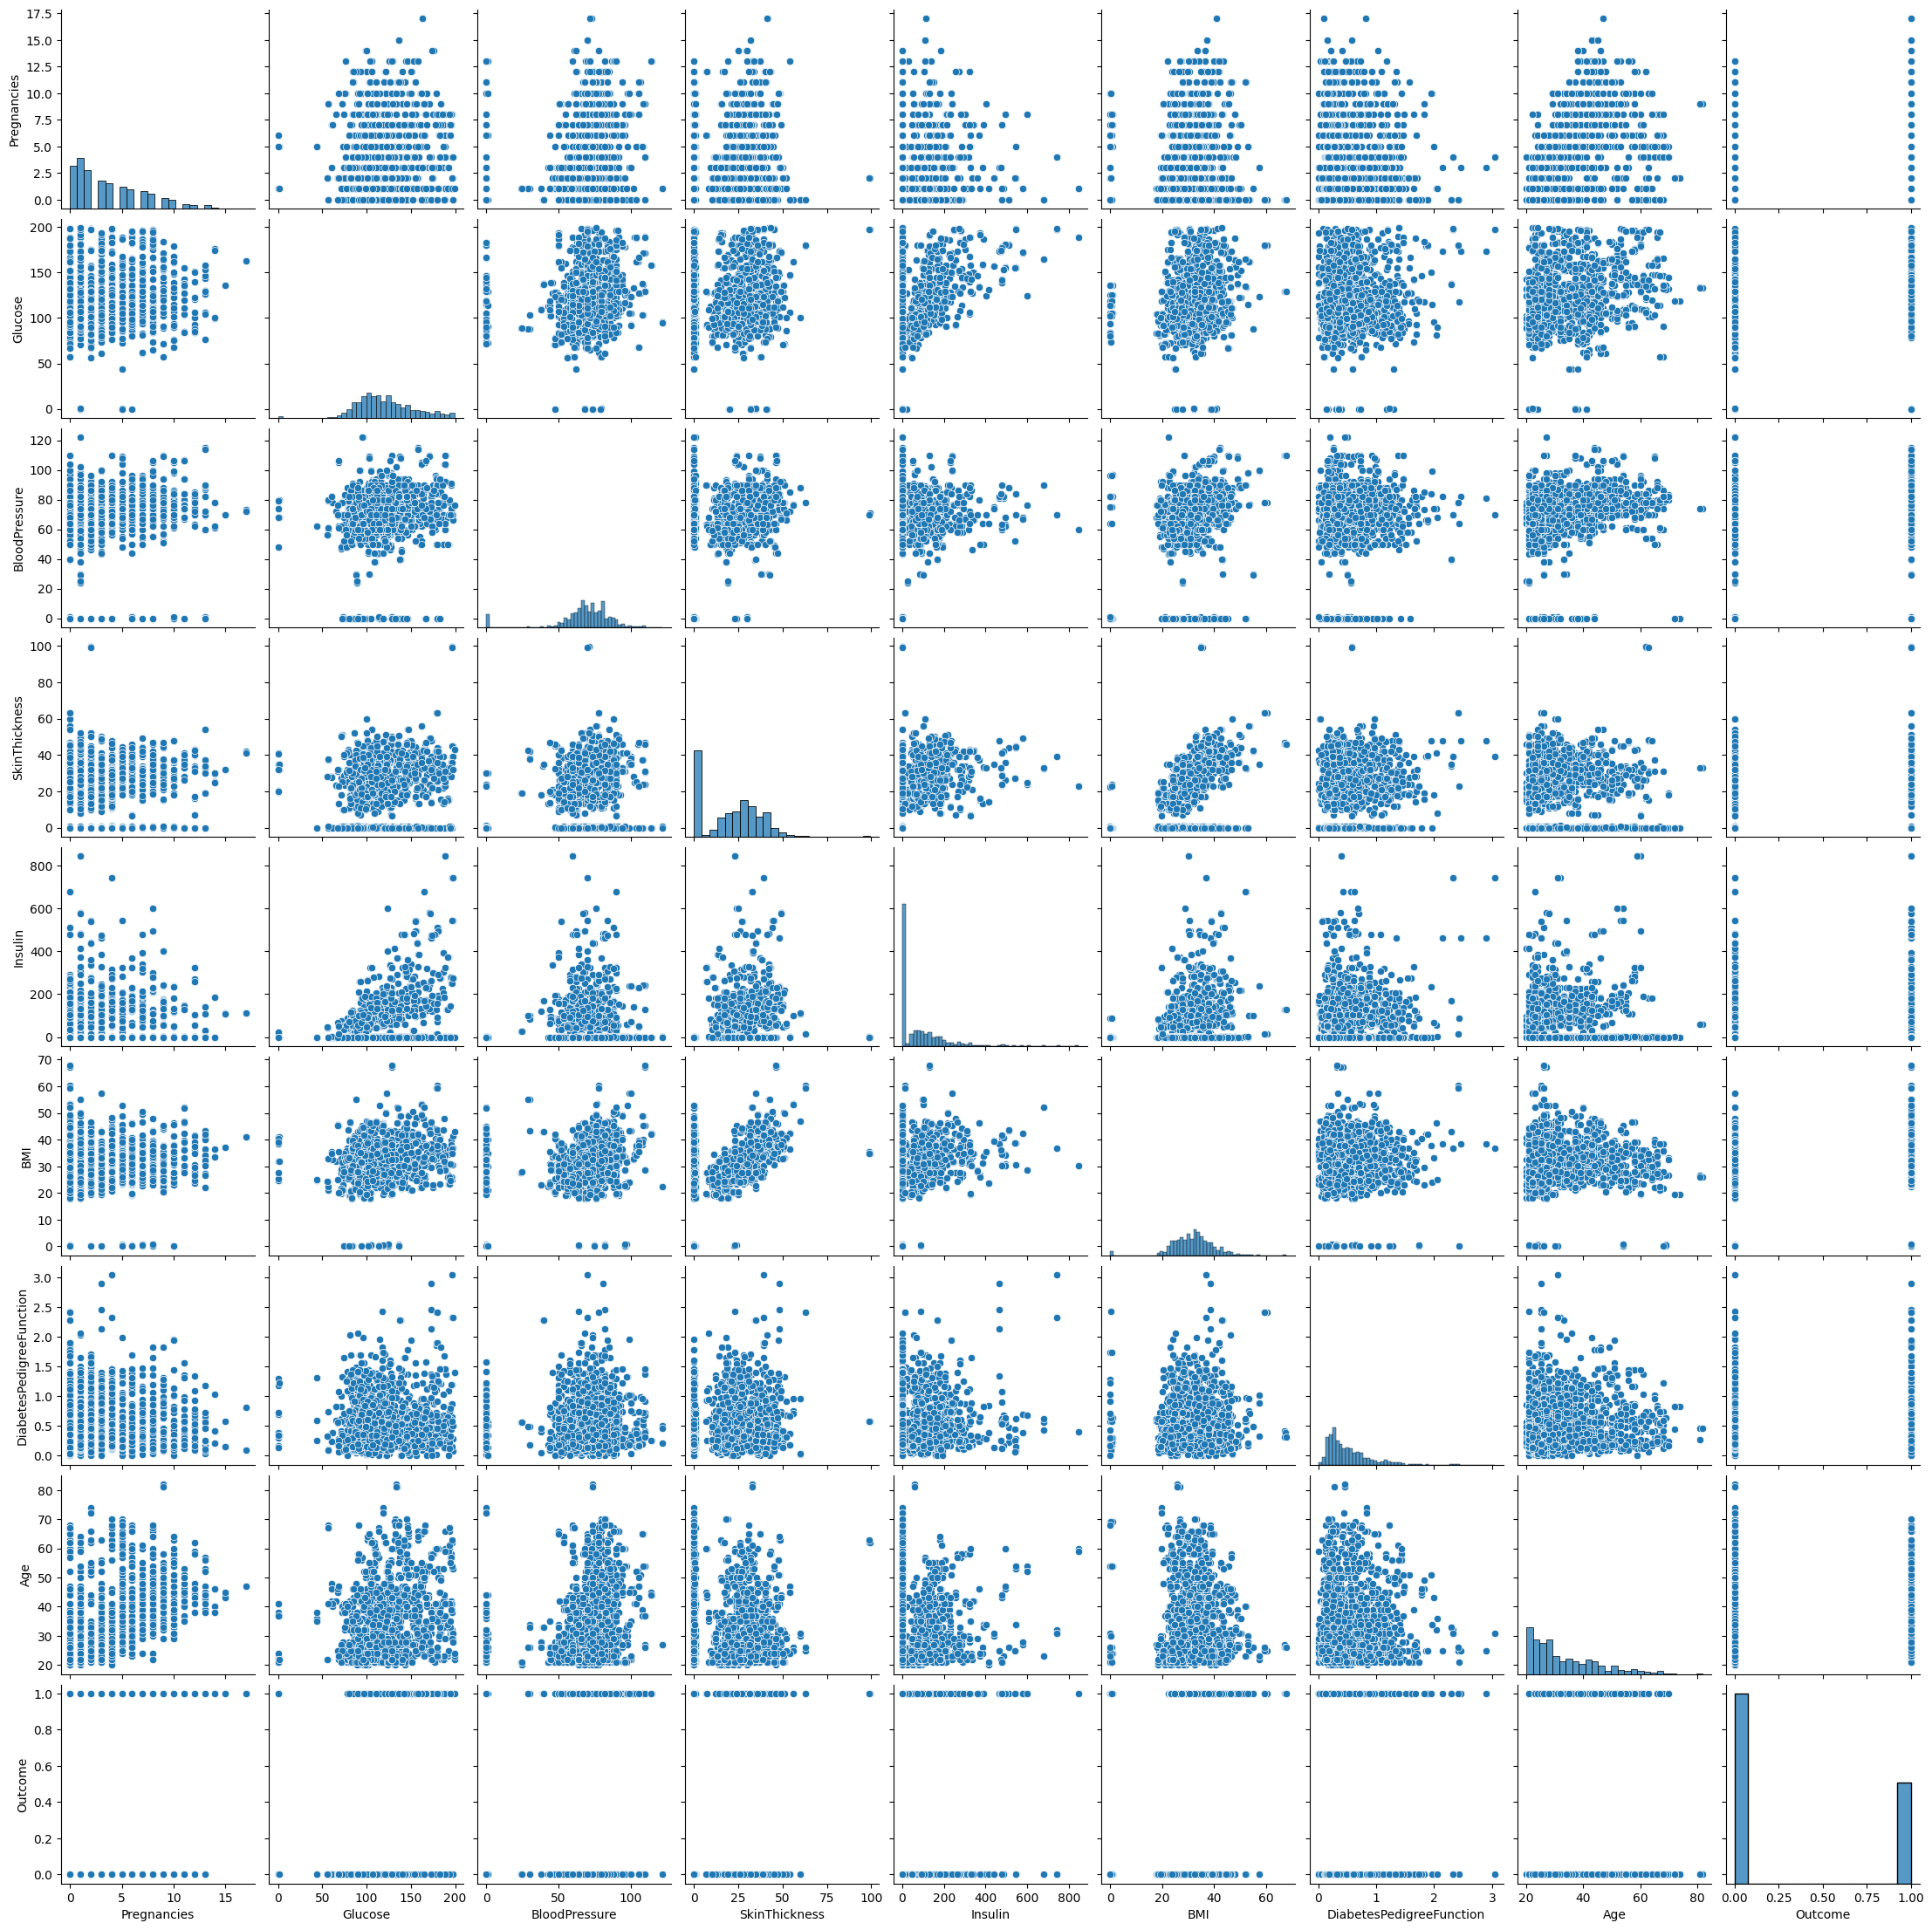

In [17]:
sns.pairplot(data=diabetes_dataset)
plt.show()

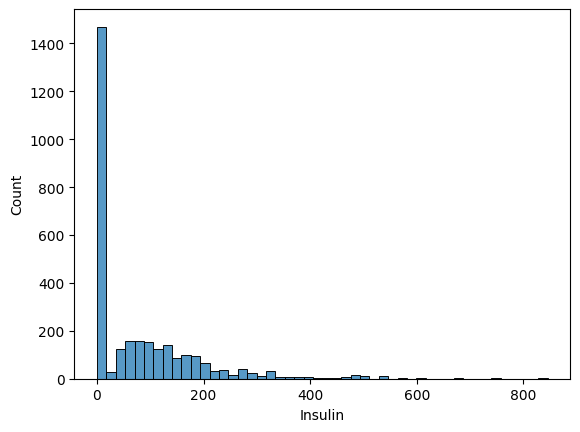

In [18]:
import matplotlib.pyplot as plt
sns.histplot(diabetes_dataset ['Insulin'])
plt.show()

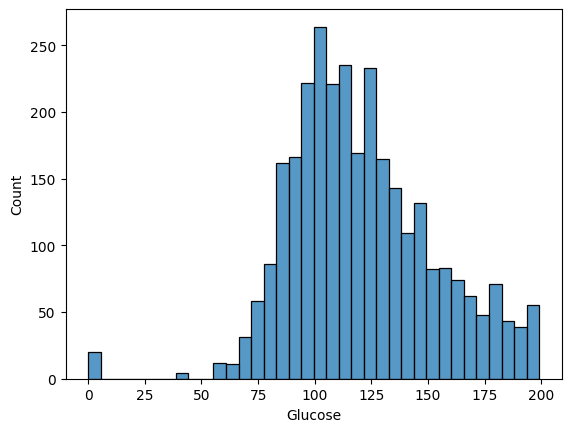

In [19]:
import matplotlib.pyplot as plt
sns.histplot(diabetes_dataset ['Glucose'])
plt.show()

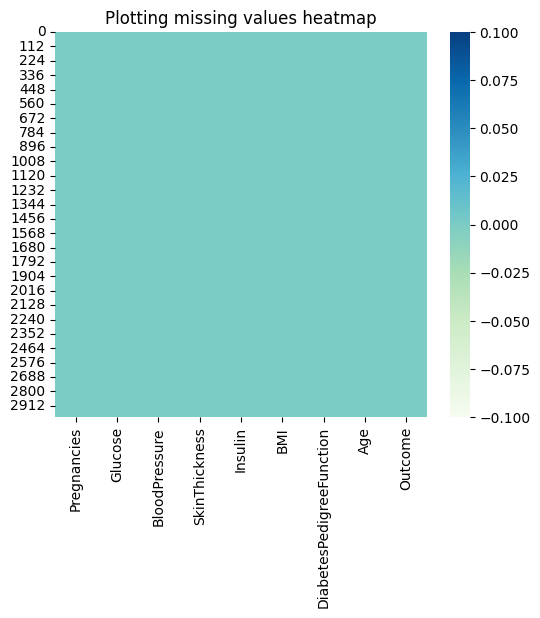

In [20]:
plt.figure(figsize=(6,5))
sns.heatmap(diabetes_dataset.isnull(), cmap="GnBu")
plt.title("Plotting missing values heatmap")
plt.show()

In [21]:

# Separate features and target
# separating the data and labels

# we are splitting the data set into Inputs (like BMI, Glucose, Insulin etc) and Output (Outcome)
# here X represents inputs & Y represents output
# axis = 1 means that the split happens in column wise i.e. "Outcome" column gets deleted and gets 
# into "X" and "Y" receives the "Outcome" column


X = diabetes_dataset.drop(columns='Outcome', axis=1)
Y = diabetes_dataset['Outcome']


In [22]:
print(X)

      Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin  \
0               6      148             72           35.0    0.000000   
1               1       85             66           29.0    0.000000   
2               8      183             64            0.0    0.000000   
3               1       89             66           23.0   94.000000   
4               0      137             40           35.0  168.000000   
...           ...      ...            ...            ...         ...   
2995           13      158            114            0.0    0.000000   
2996            2      121             70           32.0   94.701027   
2997            7      129             67           49.0  125.000000   
2998            2       90             60            0.0    0.000000   
2999            7      142             90           24.0  480.000000   

            BMI  DiabetesPedigreeFunction  Age  
0     33.600000                  0.627000   50  
1     26.600000                  0.35

In [23]:
print(Y)

0       1
1       0
2       1
3       0
4       1
       ..
2995    1
2996    0
2997    1
2998    0
2999    1
Name: Outcome, Length: 3000, dtype: int64


In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state=23)

print(X.shape, X_train.shape, X_test.shape)


(3000, 8) (2400, 8) (600, 8)


In [25]:
acc=[]

<Axes: xlabel='count', ylabel='Outcome'>

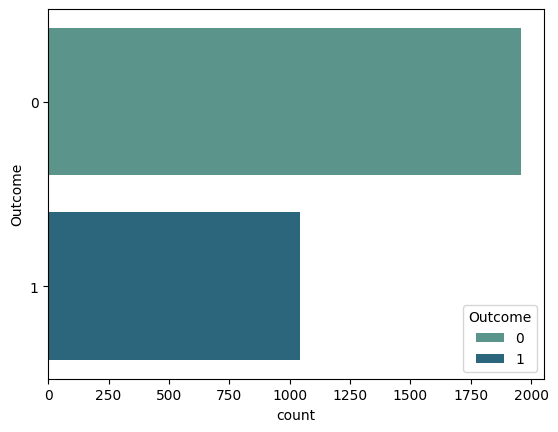

In [26]:
sns.countplot(y='Outcome', data=diabetes_dataset, palette="crest", hue='Outcome', legend=True)


In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

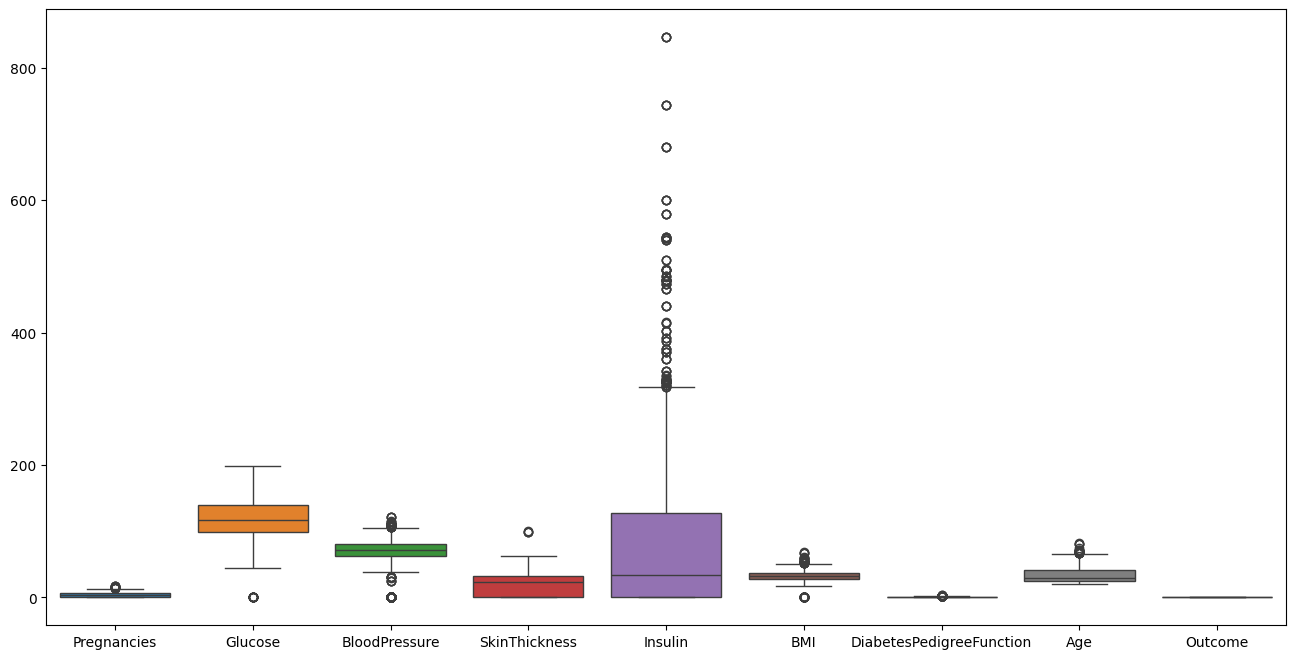

In [28]:
# Checking outliers in data set
plt.figure(figsize=(16,8))
sns.boxplot(data=diabetes_dataset)
plt.show()

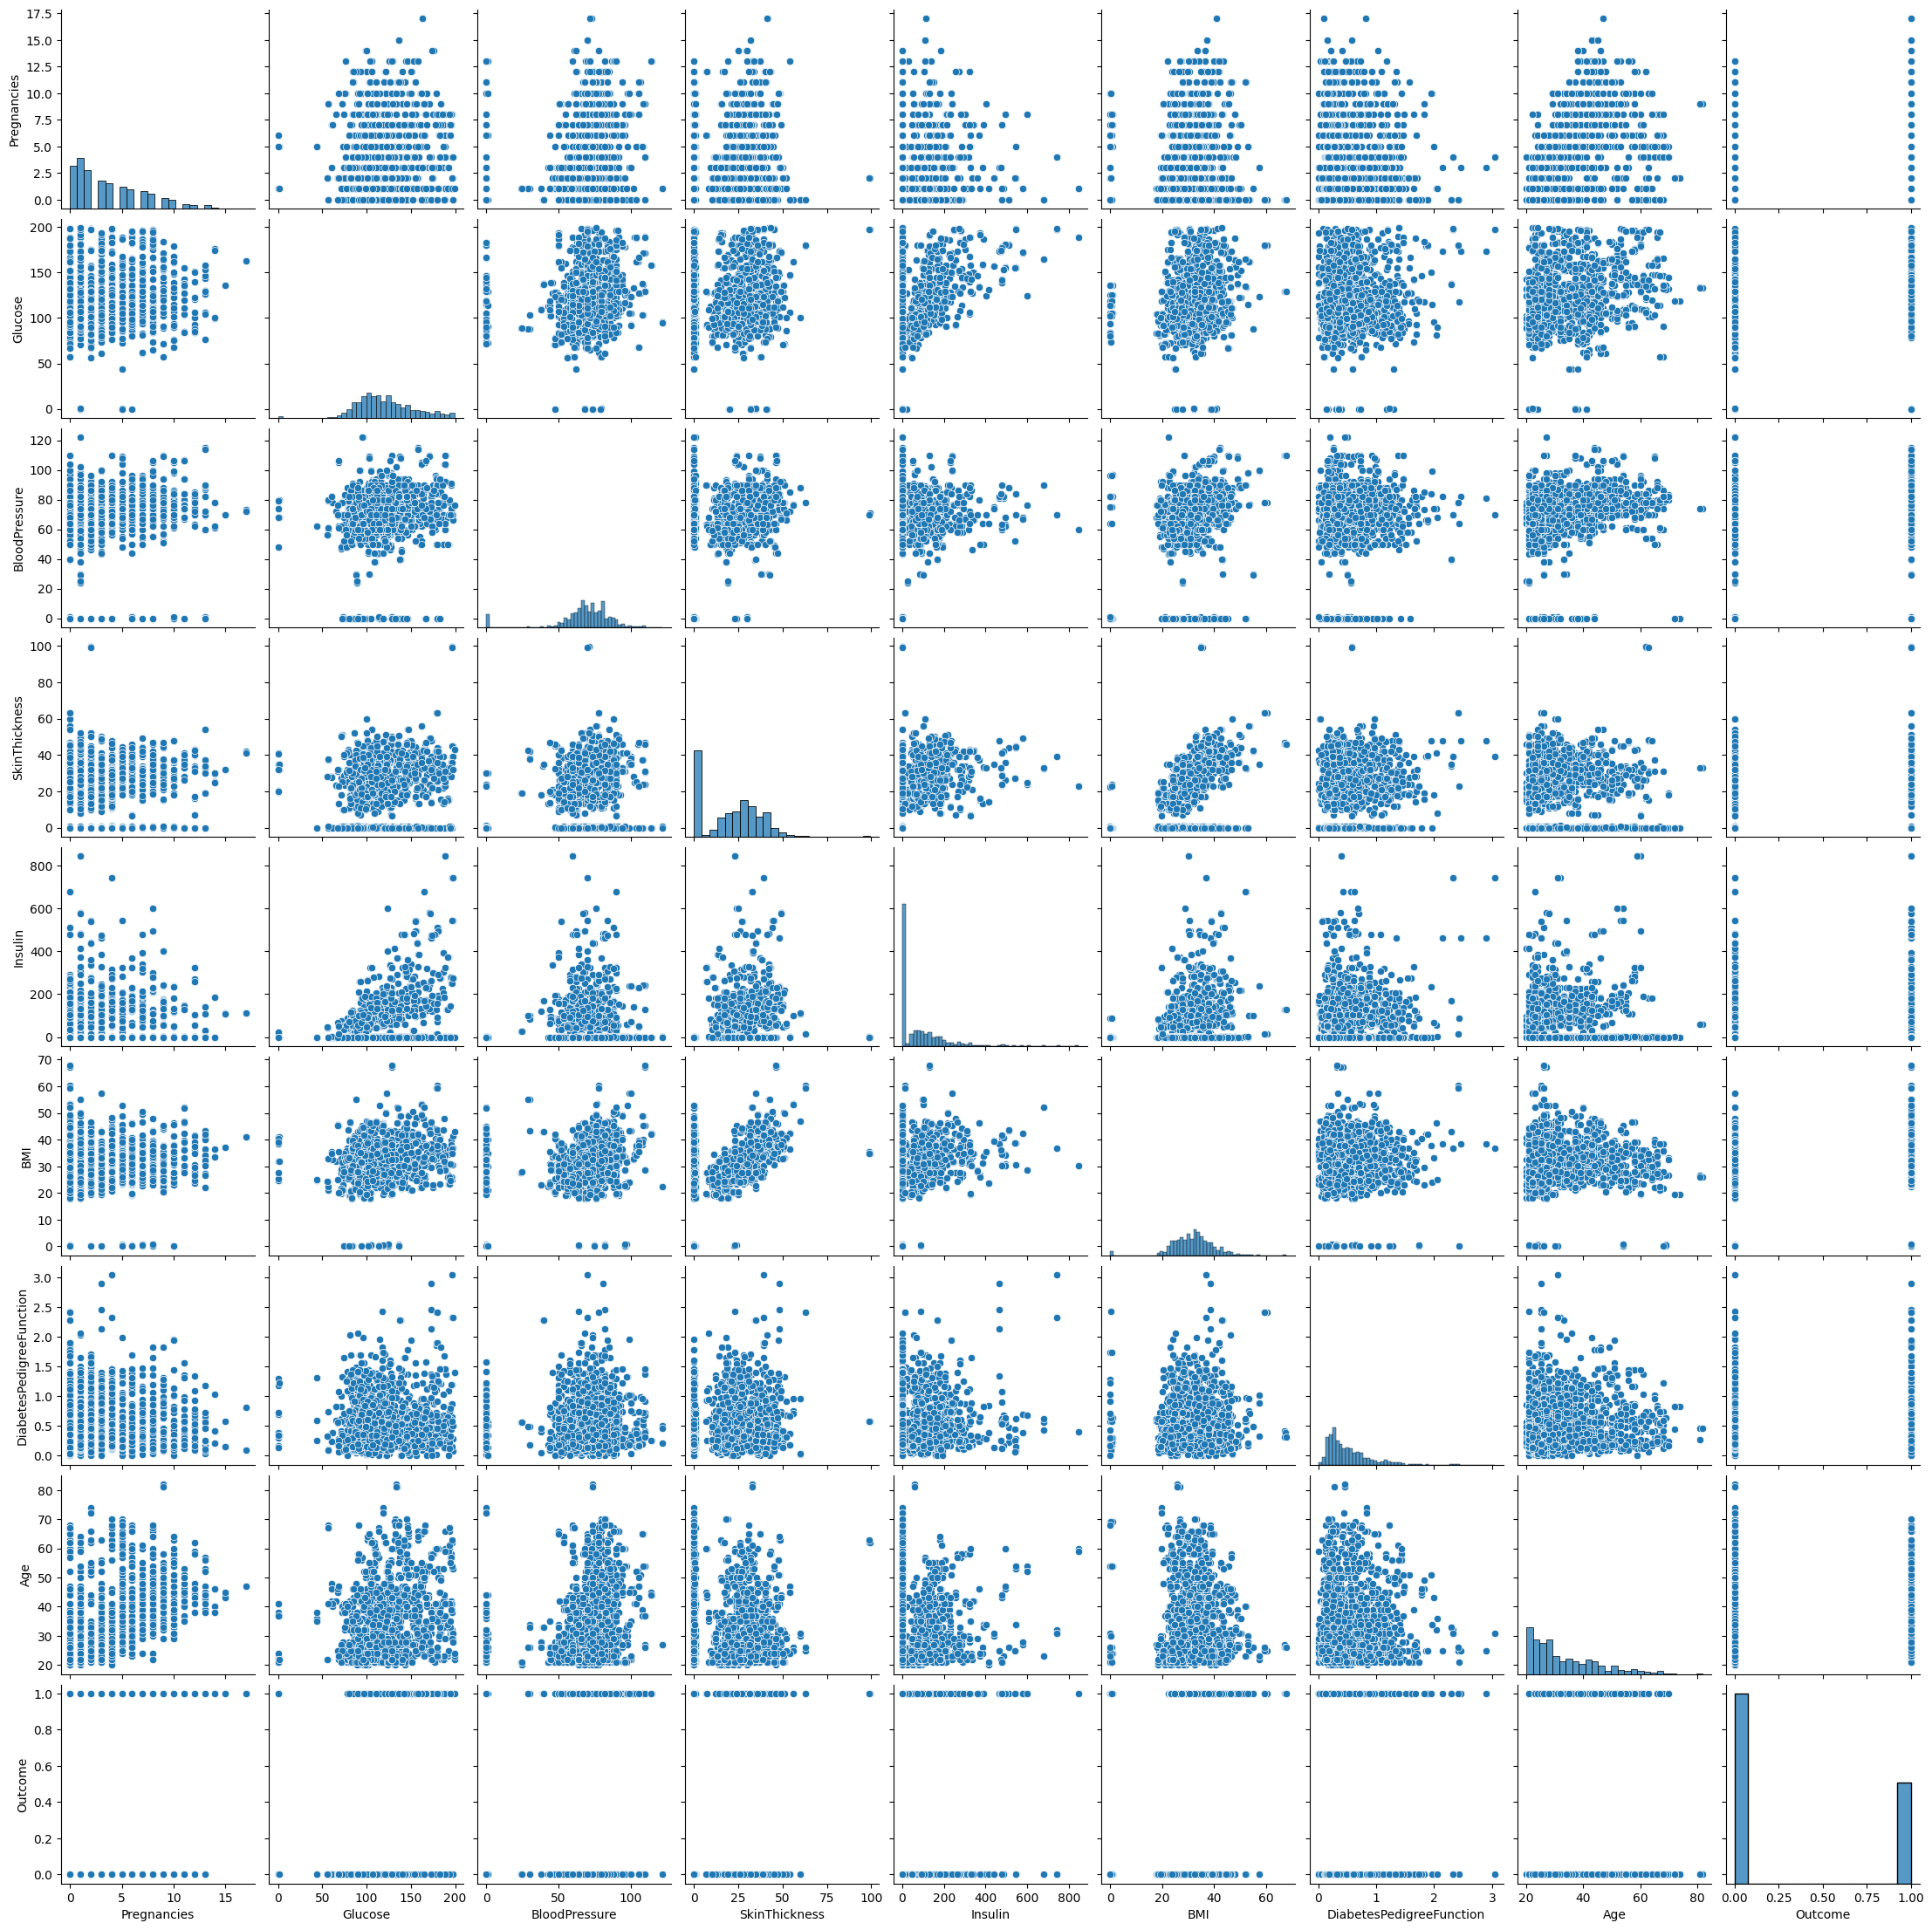

In [29]:
sns.pairplot(data=diabetes_dataset)
plt.show()

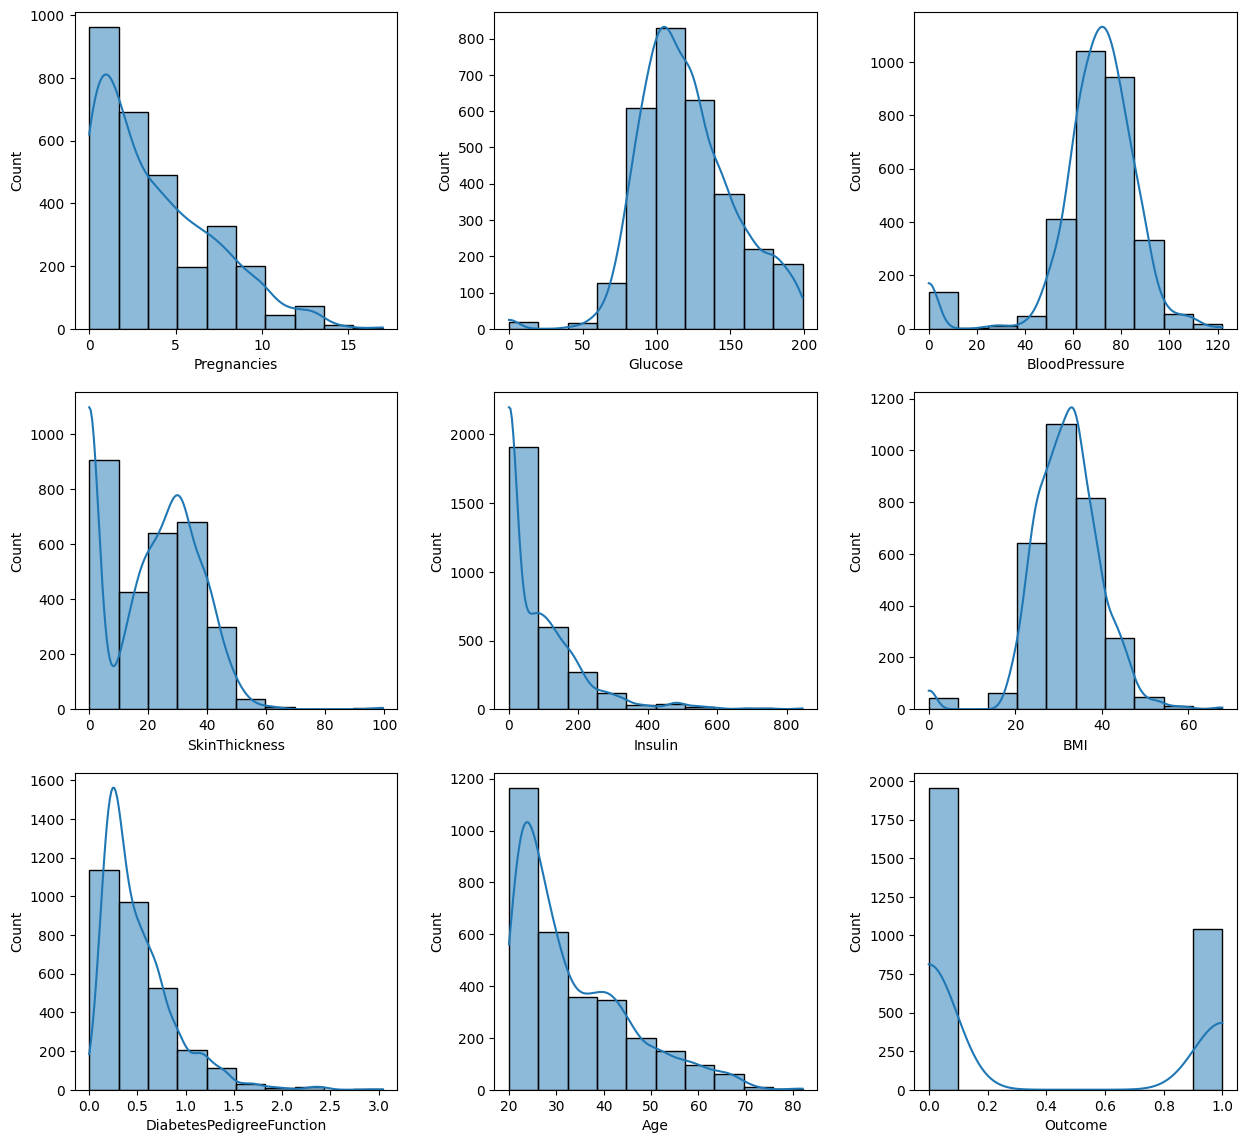

In [30]:
plt.figure(1, figsize=(15,14))
n = 0 
for x in ['Pregnancies' ,'Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']:
    n += 1
    # The plt.subplot(3, 3, n) function in Matplotlib is used to create a grid of subplots in a 
    # single figure 1st 3 is row, then column and n represents position from left to right.
    plt.subplot(3,3,n) 
    # By adjusting hspace and wspace, you can prevent overlapping of subplot titles, axes labels, 
    # or data.
    plt.subplots_adjust(hspace=0.2, wspace=0.3)
    #sns.distplot(df[x], bins=10)  #this is a deprecated command so use histplot.
    sns.histplot(diabetes_dataset[x], bins=10, kde=True)
plt.show()

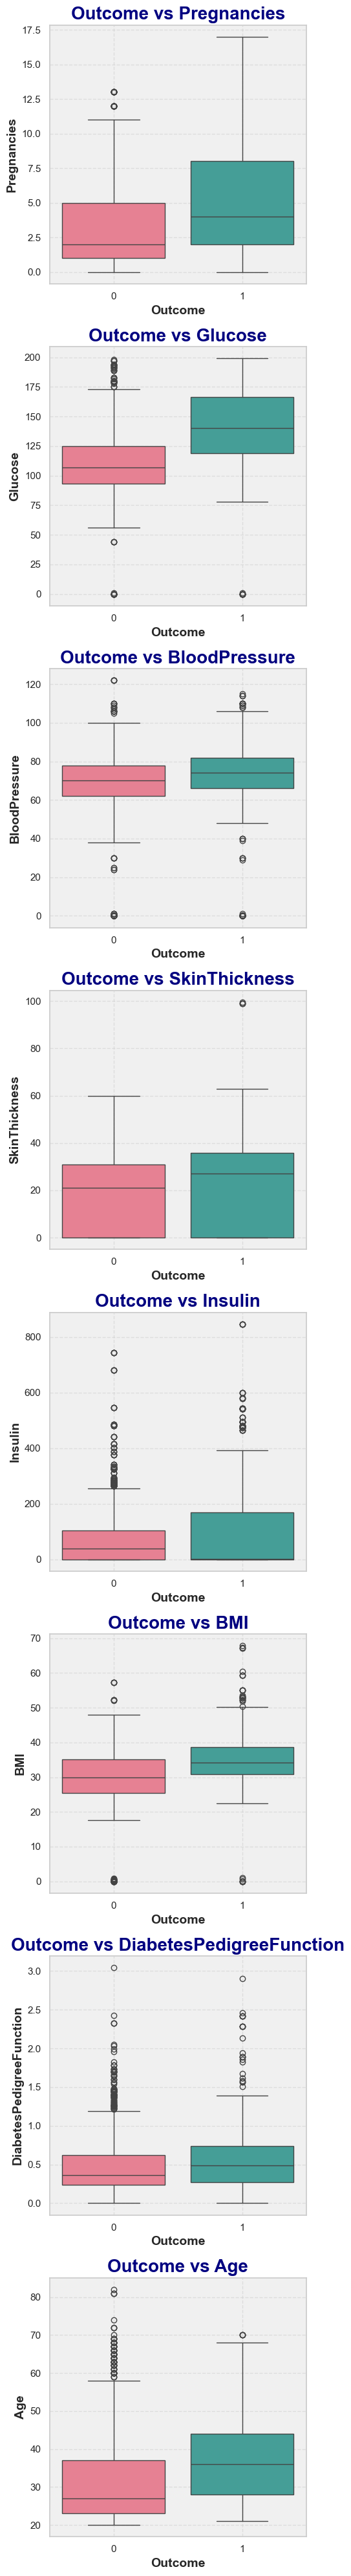

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a more appealing style for the plots
sns.set(style="whitegrid")

# Create a custom color palette with enough colors
palette = sns.color_palette("husl", n_colors=len(diabetes_dataset['Outcome'].unique()))

# Define features to plot
features = [col for col in diabetes_dataset.columns if col != 'Outcome']

# Set up the figure with subplots
fig, axes = plt.subplots(nrows=len(features), ncols=1, figsize=(5, len(features) * 5))

# Loop through each feature and create a boxplot with a customized palette
for i, feature in enumerate(features):
    sns.boxplot(x='Outcome', y=feature, data=diabetes_dataset, ax=axes[i], hue='Outcome', palette=palette, legend=False)
    axes[i].set_title(f'Outcome vs {feature}', fontsize=20, fontweight='bold', color='navy')
    axes[i].set_xlabel('Outcome', fontsize=14, fontweight='bold')
    axes[i].set_ylabel(feature, fontsize=14, fontweight='bold')

    # Customize the grid and background color for each subplot
    axes[i].grid(True, linestyle='--', alpha=0.5)
    axes[i].set_facecolor("#f0f0f0")  # Light grey background

# Adjust layout to prevent overlapping of subplots
plt.tight_layout()

# Show the plots
plt.show()


In [32]:
# Initialize empty lists to store model names and accuracy scores
acc = []  
model = [] 

Model: LogisticRegression
Accuracy: 0.7933333333333333
F1 Score: 0.6648648648648648
Recall: 0.5829383886255924
Precision: 0.7735849056603774


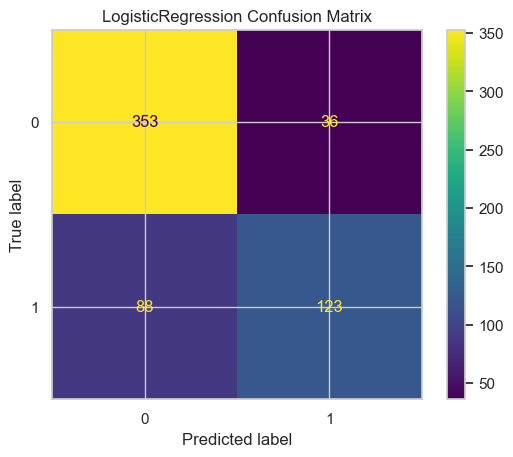

In [33]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.metrics import f1_score
# Model: LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, Y_train)
Y_pred = lr.predict(X_test)

# Model evaluation
accuracy = accuracy_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
acc.append(accuracy)
model.append('Logistic Regression')

print("Model: LogisticRegression")
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Recall:", recall)
print("Precision:", precision)

# Confusion matrix visualization
ConfusionMatrixDisplay.from_estimator(lr, X_test, Y_test)
plt.title("LogisticRegression Confusion Matrix")
plt.show()

Model: GaussianNB
Accuracy: 0.795
F1 Score: 0.6805194805194805
Recall: 0.6208530805687204
Precision: 0.7528735632183908


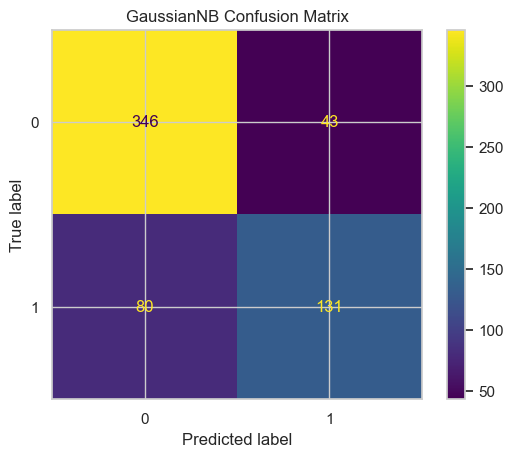

In [34]:
# Model: GaussianNB
gb = GaussianNB()
gb.fit(X_train, Y_train)
Y_pred = gb.predict(X_test)

# Model evaluation
accuracy = accuracy_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
acc.append(accuracy)
model.append('GaussianNB')

print("Model: GaussianNB")
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Recall:", recall)
print("Precision:", precision)


# Confusion matrix visualization
ConfusionMatrixDisplay.from_estimator(gb, X_test, Y_test)
plt.title("GaussianNB Confusion Matrix")
plt.show()

Model: SVC
Accuracy: 0.825
F1 Score: 0.7123287671232876
Recall: 0.6161137440758294
Precision: 0.8441558441558441


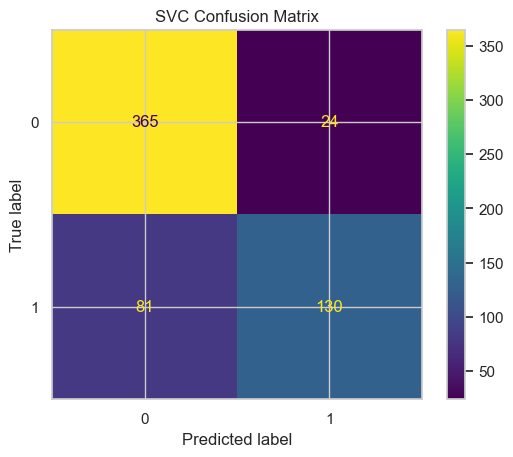

In [35]:
# Model: SVC
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)

# Model evaluation
accuracy = accuracy_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
acc.append(accuracy)
model.append('SVC')

print("Model: SVC")
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Recall:", recall)
print("Precision:", precision)

# Confusion matrix visualization
ConfusionMatrixDisplay.from_estimator(svc, X_test, Y_test)
plt.title("SVC Confusion Matrix")
plt.show()

Model: KNeighborsClassifier
Accuracy: 0.875
F1 Score: 0.8148148148148148
Recall: 0.7819905213270142
Precision: 0.8505154639175257


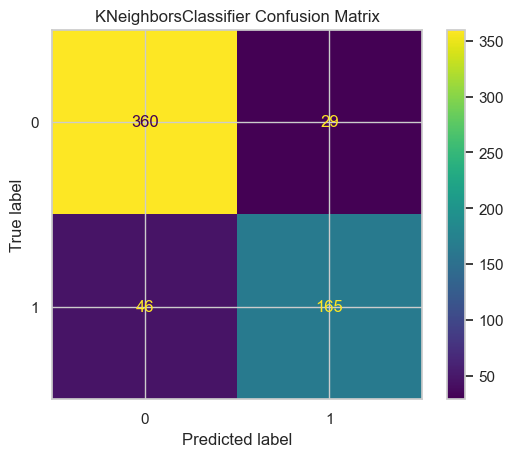

In [36]:
# Model: KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(X_train, Y_train)
Y_pred = kn.predict(X_test)

# Model evaluation
accuracy = accuracy_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
acc.append(accuracy)
model.append('KNeighborsClassifier')

print("Model: KNeighborsClassifier")
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Recall:", recall)
print("Precision:", precision)

# Confusion matrix visualization
ConfusionMatrixDisplay.from_estimator(kn, X_test, Y_test)
plt.title("KNeighborsClassifier Confusion Matrix")
plt.show() 

Model: DecisionTreeClassifier
Accuracy: 0.9516666666666667
F1 Score: 0.9324009324009324
Recall: 0.9478672985781991
Precision: 0.9174311926605505


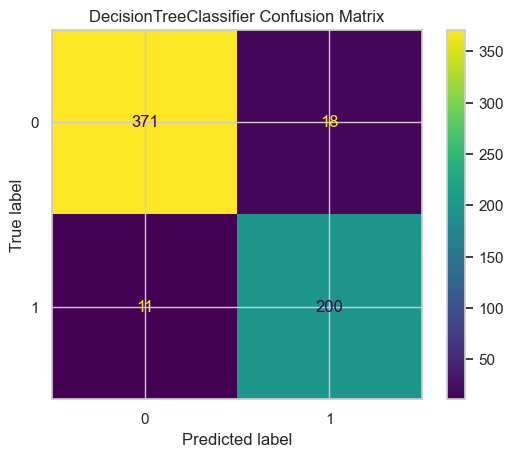

In [37]:
# Model: DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)
Y_pred = dt.predict(X_test)

# Model evaluation
accuracy = accuracy_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
acc.append(accuracy)
model.append('DecisionTreeClassifier')

print("Model: DecisionTreeClassifier")
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Recall:", recall)
print("Precision:", precision)

# Confusion matrix visualization
ConfusionMatrixDisplay.from_estimator(dt, X_test, Y_test)
plt.title("DecisionTreeClassifier Confusion Matrix")
plt.show()

Model: RandomForestClassifier
Accuracy: 0.9916666666666667
F1 Score: 0.9880668257756563
Recall: 0.981042654028436
Precision: 0.9951923076923077


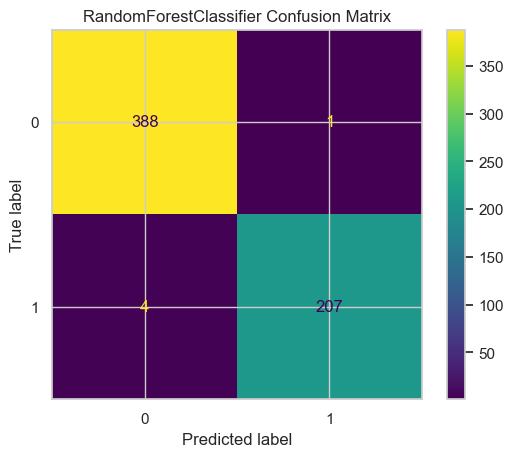

In [38]:
# Model: RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)
Y_pred = rf.predict(X_test)

# Model evaluation
accuracy = accuracy_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
acc.append(accuracy)
model.append('RandomForestClassifier')

print("Model: RandomForestClassifier")
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Recall:", recall)
print("Precision:", precision)

# Confusion matrix visualization
ConfusionMatrixDisplay.from_estimator(rf, X_test, Y_test)
plt.title("RandomForestClassifier Confusion Matrix")
plt.show()

Model: AdaBoostClassifier
Accuracy: 0.81
F1 Score: 0.7015706806282722
Recall: 0.6350710900473934
Precision: 0.783625730994152


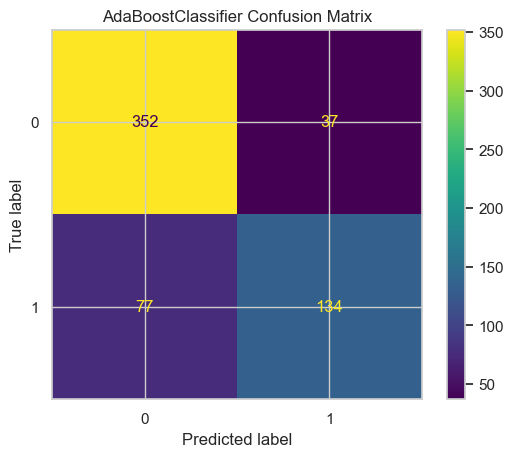

In [39]:
# Model: AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(X_train, Y_train)
Y_pred = ada.predict(X_test)

# Model evaluation
accuracy = accuracy_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
acc.append(accuracy)
model.append('AdaBoostClassifier')

print("Model: AdaBoostClassifier")
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Recall:", recall)
print("Precision:", precision)

# Confusion matrix visualization
ConfusionMatrixDisplay.from_estimator(ada, X_test, Y_test)
plt.title("AdaBoostClassifier Confusion Matrix")
plt.show()

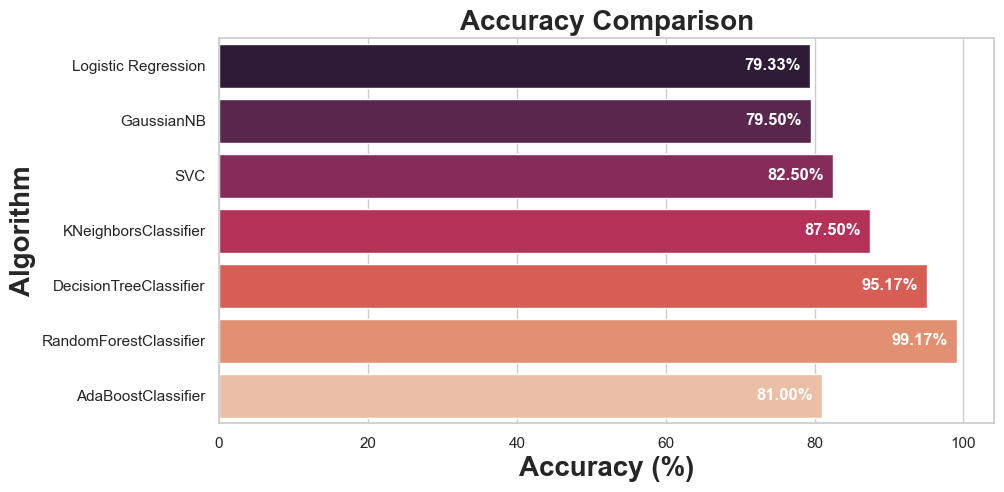

In [40]:
# Plotting the accuracy comparison
# Ensure acc has the same length and order as model
acc_percent = [accuracy * 100 for accuracy in acc]  # Convert accuracies to percentages
plt.figure(figsize=[10, 5], dpi=100)
plt.title('Accuracy Comparison', fontsize=20, fontweight='bold')  # Set plot title with styling
plt.xlabel('Accuracy (%)', fontsize=20, fontweight='bold')  # Set x-axis label
plt.ylabel('Algorithm', fontsize=20, fontweight='bold')  # Set y-axis label

# Create bar plot for accuracy percentages
sns.barplot(x=acc_percent, y=model, hue=model, palette='rocket', legend=False)

# Annotate each bar with the accuracy percentage inside the bars
for index, value in enumerate(acc_percent):
    plt.text(value - 5, index, f"{value:.2f}%", color='white', ha="center", va="center", fontweight="bold")

# Display the plot
plt.show()

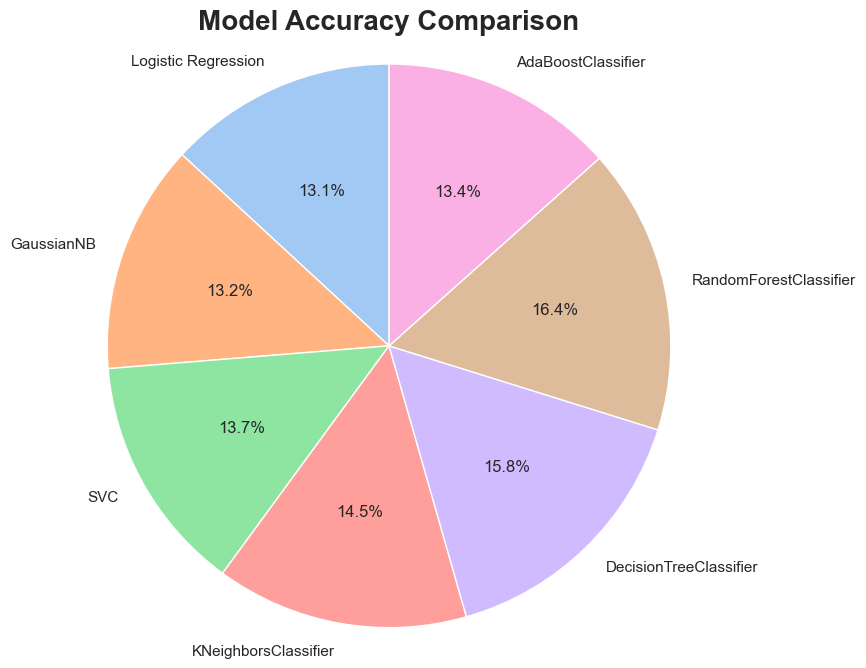

In [41]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and displayed by accuracy percentage
plt.figure(figsize=(8, 8))  # Set the size of the pie chart
plt.title('Model Accuracy Comparison', fontsize=20, fontweight='bold')  # Set plot title

# Create a pie chart
plt.pie(acc_percent, labels=model, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel")[0:len(acc_percent)])

# Display the chart
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [42]:
input_data = (5, 166, 72, 19, 175, 25.8, 0.587, 51)

# Changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Standardize the input data
std_data = sc.transform(input_data_reshaped)
# print(std_data)

prediction = rf.predict(std_data)
print(prediction)

if prediction[0] == 0:
    print('The person is not diabetic')
else:
    print('The person is diabetic')

[1]
The person is diabetic


C:\Users\hazra\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
